In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline

In [2]:
data = pd.read_csv('D:/SolarPrediction.csv')

data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
data = data.sort_values(by='UNIXTime', ascending=True).reset_index(drop=True)
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [4]:
HItz = pytz.timezone(zone='US/Hawaii')

datetimeHI = data['UNIXTime'].apply(lambda x: 
                                 datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(HItz))
data['DatetimeHI'] = datetimeHI

In [5]:
datetimeHI.head()

0   2016-09-01 00:00:08-10:00
1   2016-09-01 00:05:10-10:00
2   2016-09-01 00:20:06-10:00
3   2016-09-01 00:25:05-10:00
4   2016-09-01 00:30:09-10:00
Name: UNIXTime, dtype: datetime64[ns, US/Hawaii]

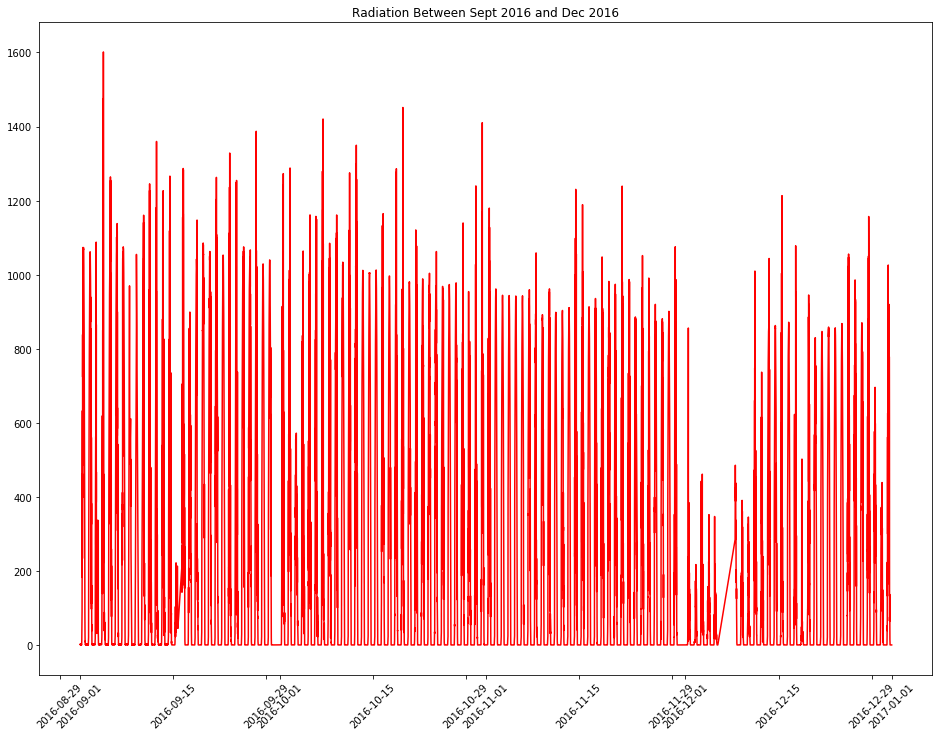

In [99]:
plt.plot(data['DatetimeHI'], data['Radiation'], color='red')
plt.title('Radiation Between Sept 2016 and Dec 2016')
plt.xticks(rotation=45);

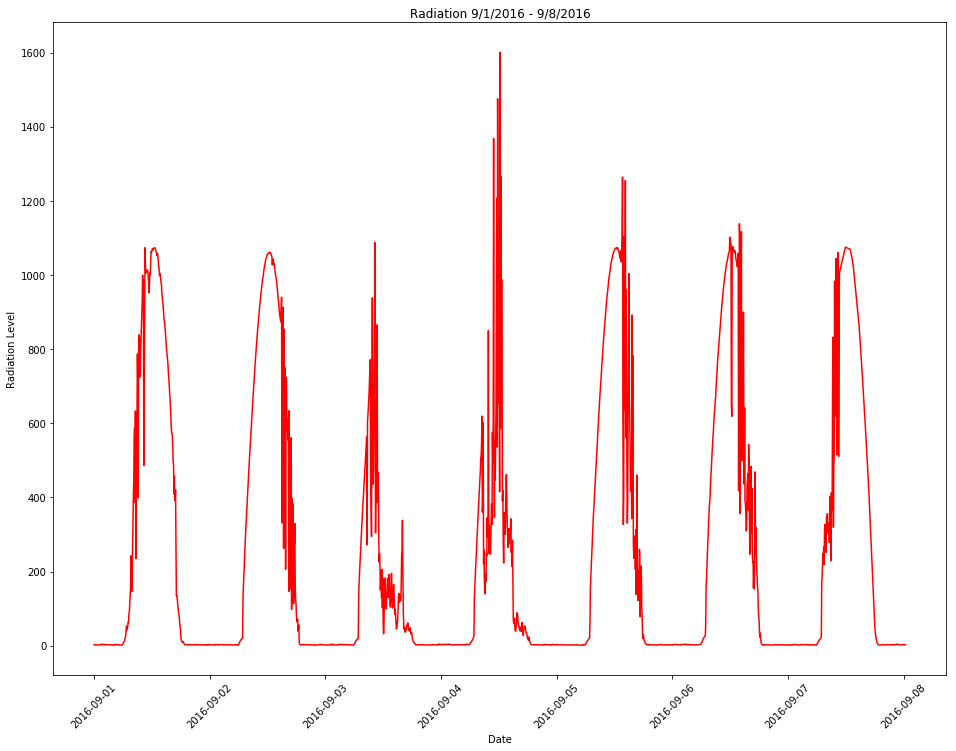

In [90]:
weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
weekonedata = data[data['DatetimeHI'] < weekendmarker]
plt.plot(weekonedata['DatetimeHI'], weekonedata['Radiation'],color='red')
plt.title('Radiation 9/1/2016 - 9/8/2016')
plt.xticks(rotation=45)
plt.ylabel('Radiation Level')
plt.xlabel('Date');

In [91]:
def week_plot(ax, dates, col, colname):

    if colname == 'Radiation':
        plt_color = 'red'
    elif colname == 'Pressure':
        plt_color = 'green'
    elif colname == 'WindDirection(Degrees)':
        plt_color = 'yellow'
    else:
        plt_color = 'blue'
    
    ax.plot(dates, col, c=plt_color)
    
    ax.set_title('{colname} 9/1/2016 - 9/8/2016'.format(colname=colname))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

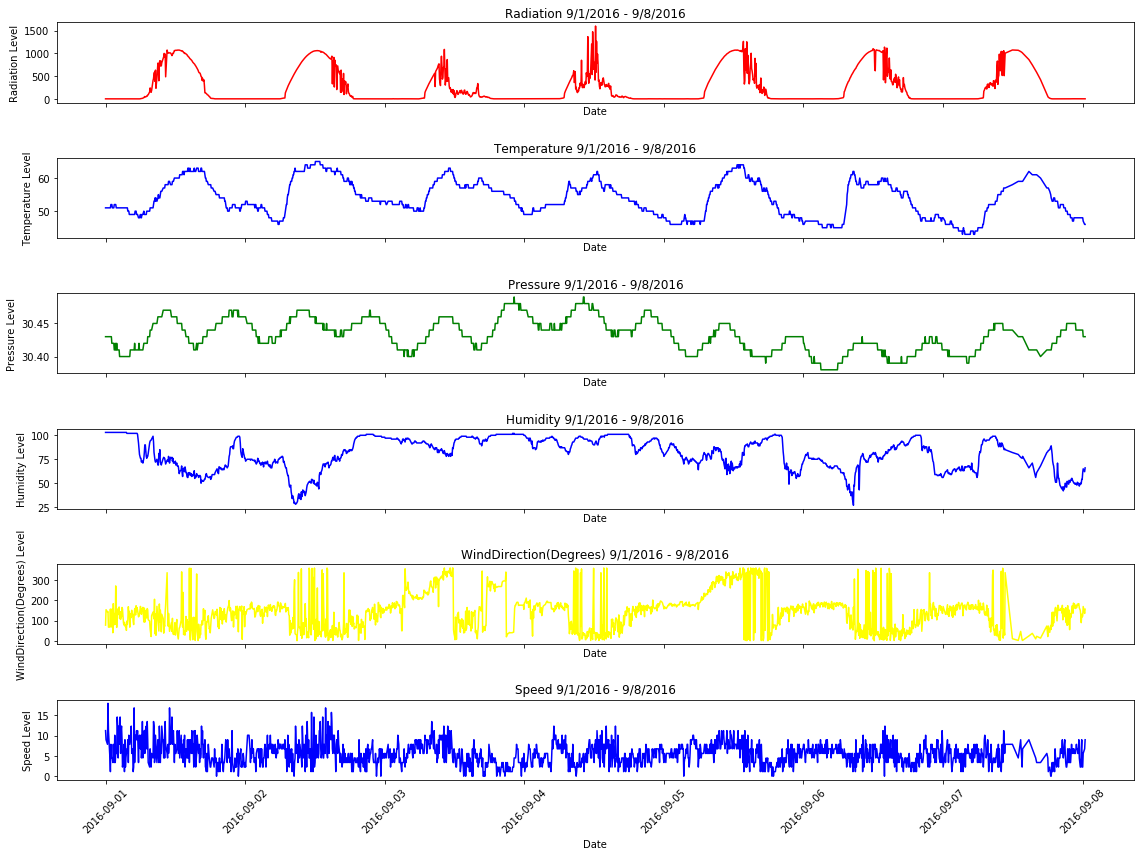

In [92]:
plt.rcParams['figure.figsize'] = 16, 12

ts_cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = week_plot(ax, weekonedata['DatetimeHI'], weekonedata[ts_cols[i]], ts_cols[i])

fig.tight_layout()

In [93]:
def date_plot(ax, data, colname, start_dt, end_dt):

    subset_data = data[(data['DatetimeHI'] > start_dt) & (data['DatetimeHI'] < end_dt)]
    dates = subset_data['DatetimeHI']
    col = subset_data[colname]
    
    srt = start_dt.strftime('%m/%d/%Y')
    end = end_dt.strftime('%m/%d/%Y')
    
    if colname == 'Radiation':
        plt_color = 'red'
    elif colname == 'Pressure':
        plt_color = 'green'
    elif colname == 'WindDirection(Degrees)':
        plt_color = 'yellow'
    else:
        plt_color = 'blue'
    
    ax.plot(dates, col, c=plt_color)
    
    ax.set_title('{colname} {srt} - {end}'.format(colname=colname, srt=srt, end=end))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

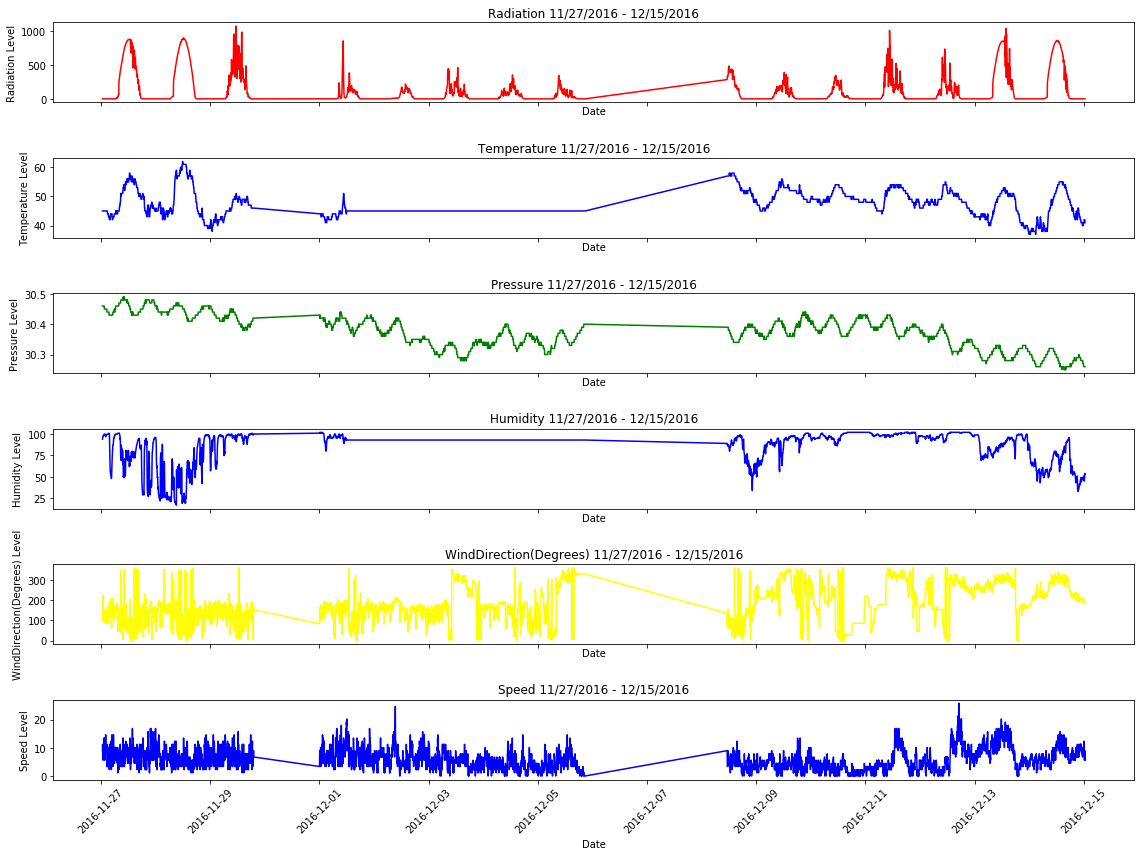

In [94]:
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = date_plot(
        ax,
        data,
        ts_cols[i],
        datetime.datetime(2016,11, 27).replace(tzinfo=HItz),
        datetime.datetime(2016,12, 15).replace(tzinfo=HItz),
    )
fig.tight_layout()

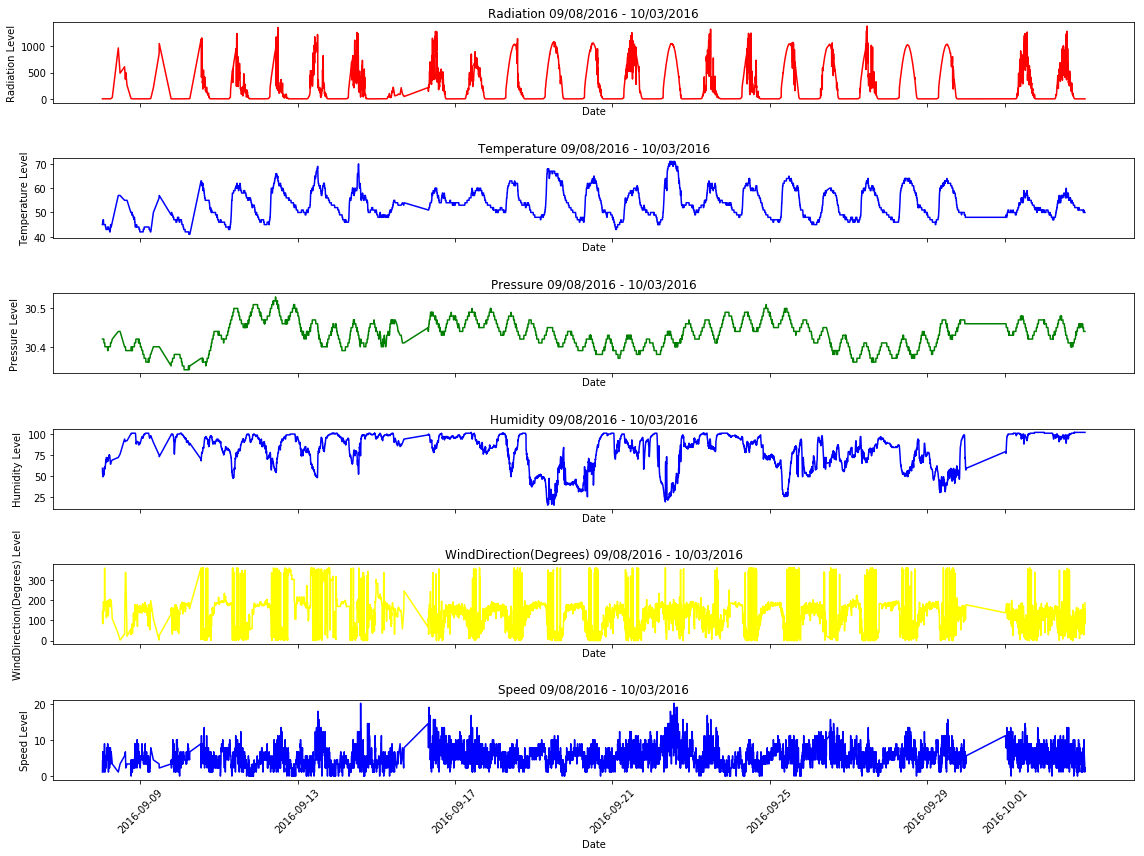

In [95]:
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = date_plot(
        ax,
        data,
        ts_cols[i],
        datetime.datetime(2016,9, 8).replace(tzinfo=HItz),
        datetime.datetime(2016,10, 3).replace(tzinfo=HItz),
    )
fig.tight_layout()

In [16]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('US/Hawaii')
data.index =  pd.to_datetime(data['UNIXTime'], unit='s')
data.index = data.index.tz_localize(pytz.utc).tz_convert(hawaii)
data['MonthOfYear'] = data.index.strftime('%m').astype(int)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['WeekOfYear'] = data.index.strftime('%U').astype(int)
data['TimeOfDay(h)'] = data.index.hour
data['TimeOfDay(m)'] = data.index.hour*60 + data.index.minute
data['TimeOfDay(s)'] = data.index.hour*60*60 + data.index.minute*60 + data.index.second
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'], format='%H:%M:%S')
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'], format='%H:%M:%S')
data['DayLength(s)'] = data['TimeSunSet'].dt.hour*60*60 \
                           + data['TimeSunSet'].dt.minute*60 \
                           + data['TimeSunSet'].dt.second \
                           - data['TimeSunRise'].dt.hour*60*60 \
                           - data['TimeSunRise'].dt.minute*60 \
                           - data['TimeSunRise'].dt.second
data.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
data.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DatetimeHI,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s)
UNIXTime,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,77.27,11.25,2016-09-01 00:00:08-10:00,9,245,35,0,0,8,45060
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,153.44,9.00,2016-09-01 00:05:10-10:00,9,245,35,0,5,310,45060
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,142.04,7.87,2016-09-01 00:20:06-10:00,9,245,35,0,20,1206,45060
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,144.12,18.00,2016-09-01 00:25:05-10:00,9,245,35,0,25,1505,45060
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,67.42,11.25,2016-09-01 00:30:09-10:00,9,245,35,0,30,1809,45060


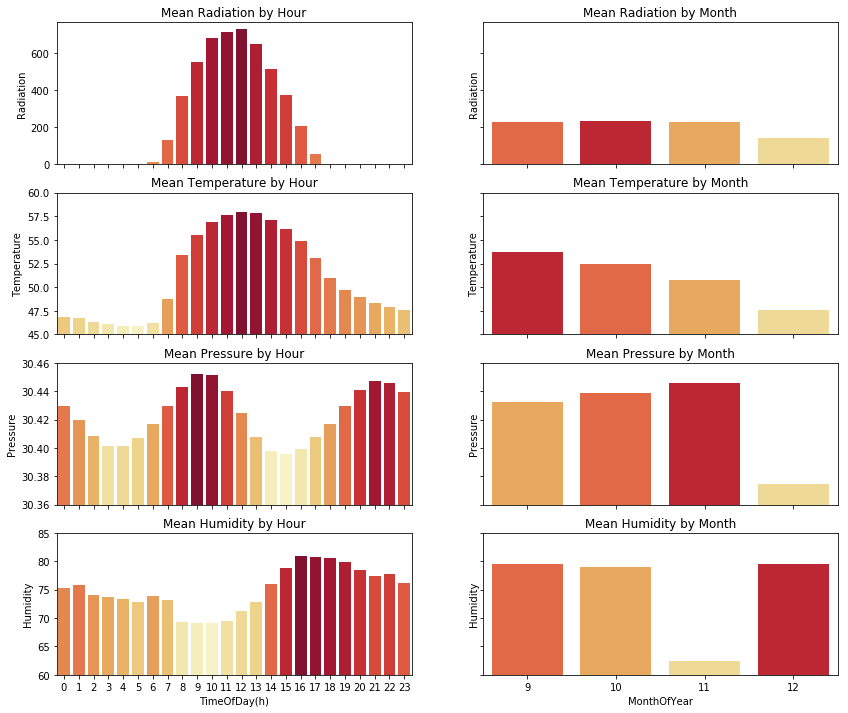

In [25]:
grouped_m=data.groupby('MonthOfYear').mean().reset_index()
grouped_w=data.groupby('WeekOfYear').mean().reset_index()
grouped_d=data.groupby('DayOfYear').mean().reset_index()
grouped_h=data.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x="MonthOfYear", y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

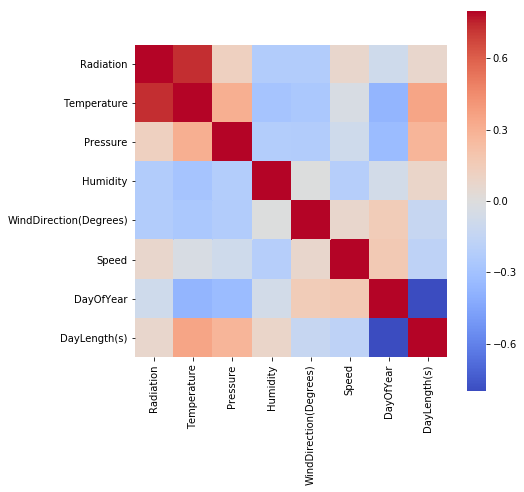

In [26]:
corrmat = data.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [27]:
X = data[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = data['Radiation']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

for i in range(0,5):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_train_opt.pop(X_train_opt.columns[least_important]))
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator = regressor,
                                 X = X_train_opt,
                                 y = y_train, cv = 5,
                                 scoring = 'r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temperature, Pressure, Humidity, WindDirection...",0.932531
1,"Temperature, Humidity, WindDirection(Degrees),...",0.930908
2,"Temperature, Humidity, DayOfYear, TimeOfDay(s)",0.934671
3,"Temperature, DayOfYear, TimeOfDay(s)",0.932756
4,"Temperature, TimeOfDay(s)",0.799599


In [30]:
X_train_best = X_train[['Temperature', 'DayOfYear', 'TimeOfDay(s)','Pressure']]
X_test_best = X_test[['Temperature', 'DayOfYear', 'TimeOfDay(s)','Pressure']]
regressor.fit(X_train_best, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.9361269352729122


In [52]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [36]:
import sklearn.metrics as sklm
import math


In [66]:
def print_metrics(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print(y_score)
print_metrics(y_test, y_score, 8) 

[234.09533425 731.04436558 294.37189843 ... 276.56045537  68.1209176
  37.67984041]
Mean Square Error      = 38440.45505467343
Root Mean Square Error = 196.0623754183179
Mean Absolute Error    = 149.7571767618905
Median Absolute Error  = 117.42118534270173
R^2                    = 0.6270814024268305
Adjusted R^2           = 0.6266816428275943


In [39]:
y_score = regressor.predict(X_test_best) 

In [40]:
print_metrics(y_test, y_score, 8)  

Mean Square Error      = 6195.78146474484
Root Mean Square Error = 78.71328645625744
Mean Absolute Error    = 28.956457999388192
Median Absolute Error  = 0.3552000000000013
R^2                    = 0.9398934759899108
Adjusted R^2           = 0.9398290432689199


In [57]:
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
alg3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1]:
y_score1 = alg3.predict(X_test_best) 


NameError: name 'alg3' is not defined

In [64]:
print_metrics(y_test, y_score1, 15)  

Mean Square Error      = 12057.738581887217
Root Mean Square Error = 109.8077346177728
Mean Absolute Error    = 51.418110442861206
Median Absolute Error  = 1.1292028800815594
R^2                    = 0.8830254492183852
Adjusted R^2           = 0.882774392387028


In [61]:
data['y_score'] = regressor.predict(data[['Temperature', 'DayOfYear', 'TimeOfDay(s)', 'Pressure']])

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="Solar Irradiance Predictions",
           x_axis_label='Date and Time',
           y_axis_label='Solar Irradiance',
           x_axis_type="datetime")
p.x_range = Range1d(data.index[0], data.index[600])
p.y_range = Range1d(-100, 1800, bounds=(-100, 1800))
p.line(data.index, data['Radiation'], legend='Observed Solar Irradiance', line_width=1)
p.line(data.index, data['y_score'], legend='Predicted Solar Irradiance', line_width=1, line_color="red")

show(p, notebook_handle = True)

ModuleNotFoundError: No module named 'PIL'